**$\underline{Planetary\hspace{0.2cm} Motion}$**

A problem of two dimensions (x and y). 

- Mass M (origin of the gravitational field $\vec g$) and $m$ = mass of the particle that undergoes the action of the gravitational field.

- Circular path of radius $\vec r = xi + yj$, $|\vec r| = r = \sqrt{x^2 + y^2}$.

- $\vec F = -\frac{GmM}{|\vec{r^3}|}$

- $\vec f = m\vec a$

- So $\vec a = -\frac{GM}{(x^2+y^2)^{3/2}}(xi+yj)$, $a_x = -\frac{GM}{(x^2+y^2)^{3/2}}x$ and $a_y = -\frac{GM}{(x^2+y^2)^{3/2}}y$

We have the following derivatives:

- $\frac{d^2x}{dt} = \frac{dv}{dt} = a_x$

- $v_x = \frac{dx}{dt}$

In the second order Runge-Kutta:

- $a_c = a(x(t),y(t))$ ; $a(x,y) = -\frac{GM}{(x^2+y^2)^{3/2}}$

Algorithm:

$x(t + \Delta t/2) = x(t) + v_x(t)\Delta t/2$

$y(t + \Delta t/2) = y(t) + v_y(t)\Delta t/2$

$v_x(t + \Delta t/2) = v_x(t) + a_cx(t)\Delta t/2$

$v_y(t + \Delta t/2) = v_y(t) + a_cy(t)\Delta t/2$


$a_c = a(x(t + \Delta t/2),y(t + \Delta t/2))$

$x(t + \Delta t) = x(t) + v_x(t+\Delta t/2)\Delta t$

$v_x(t + \Delta t) = v_x + a_cx(t + \Delta t/2)\Delta t$

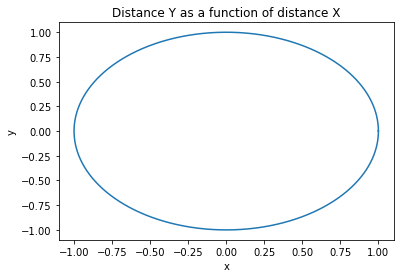

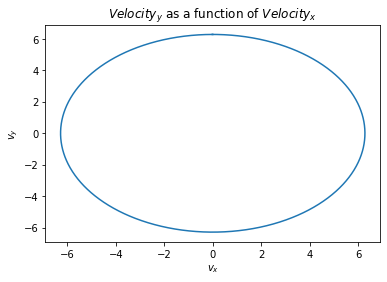

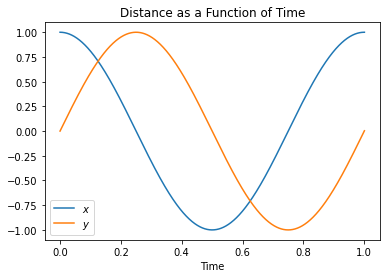

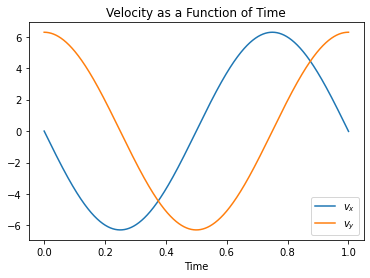

In [12]:
import numpy as np
import matplotlib.pyplot as plt

gm = 4 * (np.pi)**2
x1,x2 = 1,0
vx1,vx2 = 0,0
y1,y2 = 0,0
vy1,vy2 = 2 * np.pi,0
t,tf = 0,1
dt = 0.0005
xaux,yaux,vaux,vauy = 0,0,0,0


# Lists:
list_x = [x1]
list_y = [y1]
list_vx = [vx1]
list_vy = [vy1]
list_t = [t]

def ax(gm,x,y): 
  ax = -gm/((x**2 + y**2)**(3/2)) * x
  return ax

def ay(gm,x,y):
  ay = -gm/((x**2 + y**2)**(3/2)) * y
  return ay

while t < tf:
  xaux = x1 # x(t)
  yaux = y1
  vaux = vx1 # v(t)
  vauy = vy1
  
  x1 = x1 + vx1 * dt/2 # x(t + dt/2) = x(t) + vx(t) * dt/2
  y1 = y1 + vy1 * dt/2 # y(t + dt/2) = y(t) + vy(t) * dt/2
  vx1 = vx1 + ax(gm,xaux,yaux) * dt/2 # vx(t + dt/2) = vx(t) + ax * dt/2
  vy1 = vy1 + ay(gm,xaux,yaux) * dt/2 # vx(t + dt/2) = vx(t) + ax * dt/2
  
  x2 = xaux  + vx1 * dt # x(t + dt) = x(t) + vx(t + dt/2) * dt -> old x1, in that case, is xaux.
  list_x.append(x2)
  
  y2 = yaux + vy1 * dt # y(t + dt) = y(t) + vy(t + dt/2) * dt
  list_y.append(y2)
  
  vx2 = vaux + ax(gm,x1,y1) * dt # vx(t + dt) = vx(t) + ax(t + dt/2) * dt
  list_vx.append(vx2) 

  vy2 = vauy + ay(gm,x1,y1) * dt # vy(t + dt) = vy(t) + ay(t + dt/2) * dt
  list_vy.append(vy2)
  
  x1 = x2
  y1 = y2
  vx1 = vx2
  vy1 = vy2

  t = t + dt
  list_t.append(t)


# Graphs:
plt.plot(list_x,list_y)
plt.title('Distance Y as a function of distance X')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.plot(list_vx,list_vy)
plt.title('$Velocity_y$ as a function of $Velocity_x$')
plt.xlabel('$v_x$')
plt.ylabel('$v_y$')
plt.show()

plt.plot(list_t,list_x)
plt.plot(list_t,list_y)
plt.legend(['$x$','$y$'])
plt.title('Distance as a Function of Time')
plt.xlabel('Time')
plt.show()

plt.plot(list_t,list_vx)
plt.plot(list_t,list_vy)
plt.legend(['$v_x$','$v_y$'])
plt.title('Velocity as a Function of Time')
plt.xlabel('Time')
plt.show()

Doing in another way:

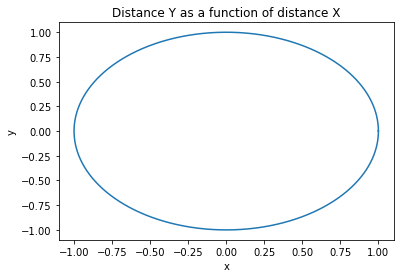

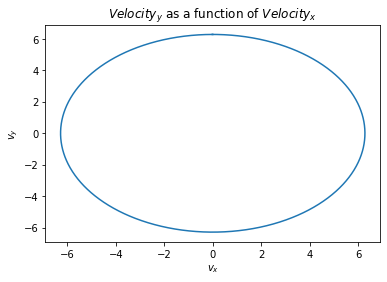

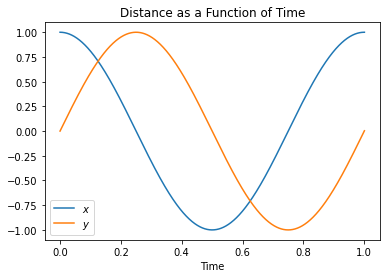

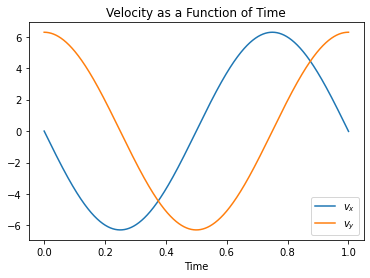

In [14]:
import numpy as np
import matplotlib.pyplot as plt

gm = 4 * (np.pi)**2
x1 = 1
vx1 = 0
y1 = 0
vy1 = 2 * np.pi
t,tf = 0,1
dt = 0.0005
xaux,yaux,vaux,vauy = 0,0,0,0
au = 1.996 * (10**11) # 1 Astronomical unit.


# Lists:
list_x = [x1]
list_y = [y1]
list_vx = [vx1]
list_vy = [vy1]
list_t = [t]

def a(gm,x,y): 
  a = -gm/((x**2 + y**2)**(3/2))
  return a

while t < tf:
  xaux = x1 # x(t)
  yaux = y1
  vaux = vx1 # v(t)
  vauy = vy1
  
  x1 = x1 + vx1 * dt/2 # x(t + dt/2) = x(t) + vx(t) * dt/2
  y1 = y1 + vy1 * dt/2 # y(t + dt/2) = y(t) + vy(t) * dt/2
  vx1 = vx1 + a(gm,xaux,yaux) * xaux * dt/2 # vx(t + dt/2) = vx(t) + ax * dt/2
  vy1 = vy1 + a(gm,xaux,yaux) * yaux * dt/2 # vx(t + dt/2) = vx(t) + ax * dt/2
  
  x2 = xaux  + vx1 * dt # x(t + dt) = x(t) + vx(t + dt/2) * dt 
  list_x.append(x2)
  
  y2 = yaux + vy1 * dt # y(t + dt) = y(t) + vy(t + dt/2) * dt
  list_y.append(y2)
  
  vx2 = vaux + a(gm,x1,y1) * x1 * dt # vx(t + dt) = vx(t) + ax(t + dt/2) * dt
  list_vx.append(vx2) # We can create an acceleration function only, and then multiply by x or y (using the term in 
  # common between ax and ay).
  
  vy2 = vauy + a(gm,x1,y1) * y1 * dt # vy(t + dt) = vy(t) + ay(t + dt/2) * dt
  list_vy.append(vy2)
  
  x1 = x2
  y1 = y2
  vx1 = vx2
  vy1 = vy2

  t = t + dt
  list_t.append(t)


# Graphs:
plt.plot(list_x,list_y)
plt.title('Distance Y as a function of distance X')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.plot(list_vx,list_vy)
plt.title('$Velocity_y$ as a function of $Velocity_x$')
plt.xlabel('$v_x$')
plt.ylabel('$v_y$')
plt.show()

plt.plot(list_t,list_x)
plt.plot(list_t,list_y)
plt.legend(['$x$','$y$'])
plt.title('Distance as a Function of Time')
plt.xlabel('Time')
plt.show()

plt.plot(list_t,list_vx)
plt.plot(list_t,list_vy)
plt.legend(['$v_x$','$v_y$'])
plt.title('Velocity as a Function of Time')
plt.xlabel('Time')
plt.show()